all code is from snow day EDA video [here](https://uva.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=ef43ce4f-331c-4442-81be-b3df010c9cc2)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('../data/cville_weather.csv')
df.head()

,STATION,NAME,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES
0,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-04,NaN,NaN,NaN,NaN,0.03,",,N",NaN,NaN,NaN,NaN
1,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-07,NaN,NaN,NaN,NaN,1.08,",,N",NaN,NaN,NaN,NaN
2,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-09,NaN,NaN,NaN,NaN,0.24,",,N",NaN,NaN,NaN,NaN
3,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-10,NaN,NaN,NaN,NaN,3.00,",,N",NaN,NaN,NaN,NaN
4,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-24,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN


In [4]:
df['PRCP'].value_counts()

PRCP
0.00    220
0.04     10
0.02      9
0.08      9
0.03      7
       ... 
1.30      1
3.22      1
3.18      1
0.43      1
1.10      1
Name: count, Length: 94, dtype: int64

<Axes: xlabel='PRCP', ylabel='Count'>

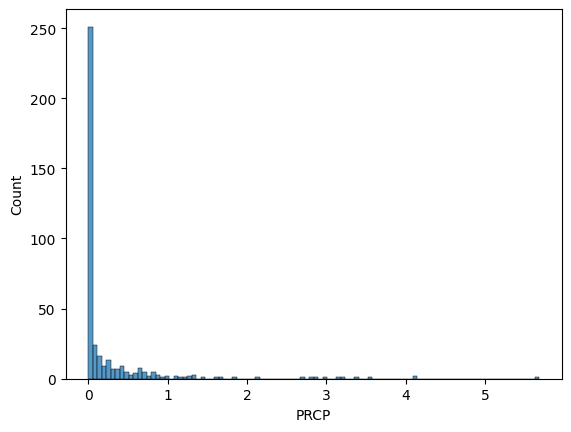

In [7]:
sns.histplot(df['PRCP'], bins=100)

In [ ]:
df['PRCP'].describe()
# count > 365 because there are two stations reporting data

count    399.000000
mean       0.259825
std        0.652143
min        0.000000
25%        0.000000
50%        0.000000
75%        0.220000
max        5.680000
Name: PRCP, dtype: float64

/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='PRCP', ylabel='Count'>

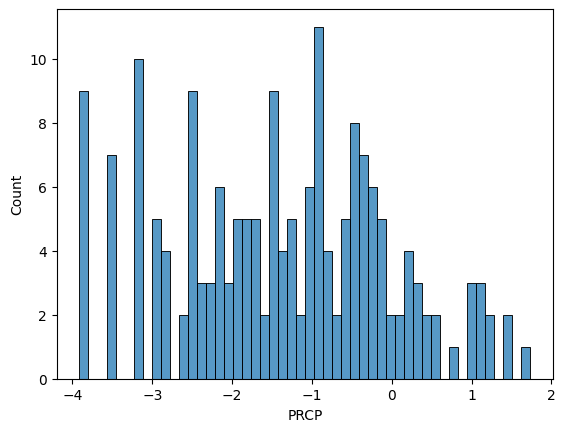

In [12]:
sns.histplot(np.log(df['PRCP']), bins=50)

this data is "zero inflated"

In [14]:
df2 = pd.read_csv('../data/ames_prices.csv')
df2.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


<Axes: xlabel='price', ylabel='Density'>

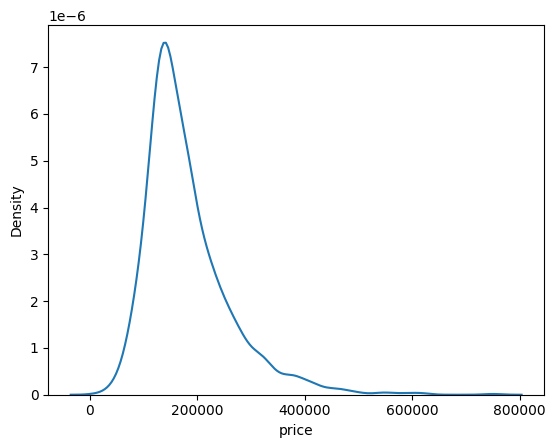

In [15]:
sns.kdeplot(df2['price'])

<Axes: xlabel='price'>

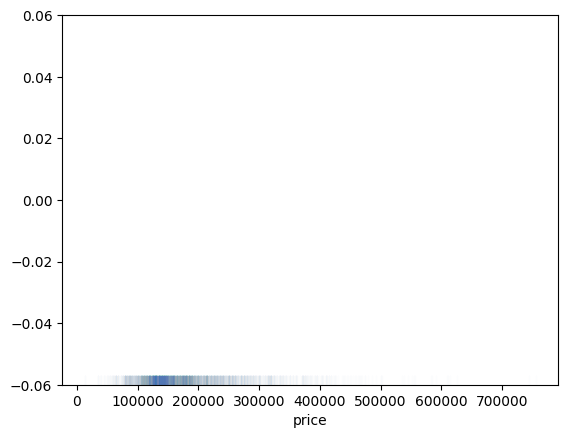

In [21]:
sns.rugplot(df2['price'], alpha=0.01)

In [22]:
df2.columns

Index(['Order', 'PID', 'area', 'price', 'MS.SubClass', 'MS.Zoning',
       'Lot.Frontage', 'Lot.Area', 'Street', 'Alley', 'Lot.Shape',
       'Land.Contour', 'Utilities', 'Lot.Config', 'Land.Slope', 'Neighborhood',
       'Condition.1', 'Condition.2', 'Bldg.Type', 'House.Style',
       'Overall.Qual', 'Overall.Cond', 'Year.Built', 'Year.Remod.Add',
       'Roof.Style', 'Roof.Matl', 'Exterior.1st', 'Exterior.2nd',
       'Mas.Vnr.Type', 'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond',
       'Foundation', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure',
       'BsmtFin.Type.1', 'BsmtFin.SF.1', 'BsmtFin.Type.2', 'BsmtFin.SF.2',
       'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating', 'Heating.QC', 'Central.Air',
       'Electrical', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF',
       'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath',
       'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual', 'TotRms.AbvGrd',
       'Functional', 'Fireplaces', 'Fireplace.Qu', 'Garage.Type',
       'Garage.Yr.B

In [25]:
df2['Bldg.Type'].value_counts()

Bldg.Type
1Fam      2425
TwnhsE     233
Duplex     109
Twnhs      101
2fmCon      62
Name: count, dtype: int64

<Axes: xlabel='price', ylabel='Density'>

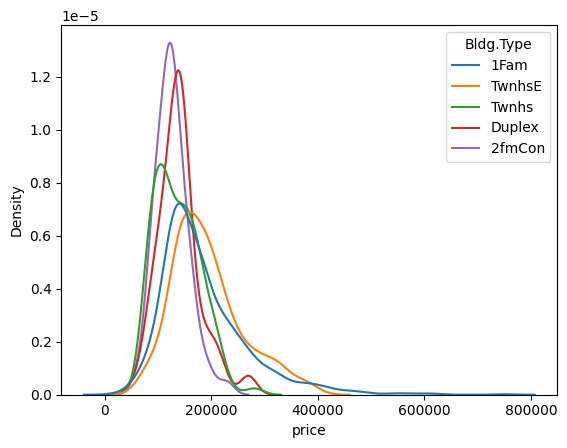

In [33]:
sns.kdeplot(x=df2['price'], hue=df2['Bldg.Type'], common_norm=False)

In [34]:
df2.loc[:, ['price', 'Bldg.Type']].groupby('Bldg.Type').describe()

price                                                            \
            count           mean           std      min       25%       50%   
Bldg.Type                                                                     
1Fam       2425.0  184812.041237  82821.802329  12789.0  130000.0  165000.0   
2fmCon       62.0  125581.709677  31089.239840  55000.0  106562.5  122250.0   
Duplex      109.0  139808.935780  39498.973534  61500.0  118858.0  136905.0   
Twnhs       101.0  135934.059406  41938.931130  73000.0  100500.0  130000.0   
TwnhsE      233.0  192311.914163  66191.738021  71000.0  145000.0  180000.0   

                               
                75%       max  
Bldg.Type                      
1Fam       220000.0  755000.0  
2fmCon     140000.0  228950.0  
Duplex     153337.0  269500.0  
Twnhs      170000.0  280750.0  
TwnhsE     222000.0  392500.0

<Axes: xlabel='area', ylabel='price'>

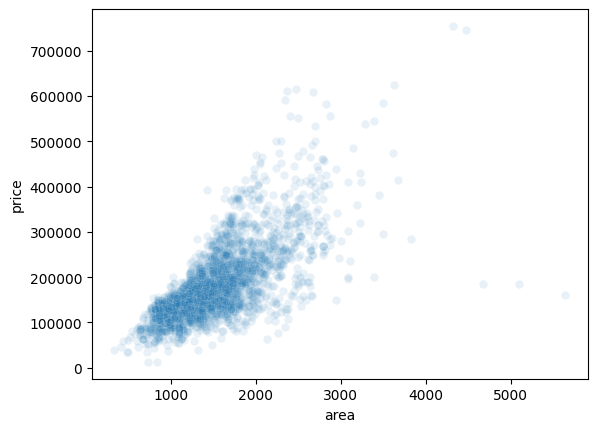

In [38]:
sns.scatterplot(x=df2['area'], y=df2['price'], alpha=0.1)

In [39]:
df2.loc[:, ['price', 'area']].cov()

,price,area
price,6.381884e+09,2.854220e+07
area,2.854220e+07,2.555392e+05


In [ ]:
df2.loc[:, ['price', 'area']].corr()
# about 70% of the variation in price can be explained by the area

,price,area
price,1.00000,0.70678
area,0.70678,1.00000


In [43]:
df3 = df2.loc[:, ['Bldg.Type', 'House.Style']]
df3.head()

,Bldg.Type,House.Style
0,1Fam,1Story
1,1Fam,1Story
2,1Fam,1Story
3,1Fam,1Story
4,1Fam,2Story


In [45]:
pd.crosstab(df3['Bldg.Type'], df3['House.Style'])

House.Style,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
Bldg.Type,,,,,,,,
1Fam,289,18,1222,7,18,703,48,120
2fmCon,19,1,16,1,4,18,2,1
Duplex,5,0,57,0,2,25,19,1
Twnhs,1,0,19,0,0,71,6,4
TwnhsE,0,0,167,0,0,56,8,2


In [50]:
pd.crosstab(df3['Bldg.Type'], df3['House.Style'], dropna=True, normalize=True, margins=True)

House.Style,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,All
Bldg.Type,,,,,,,,,
1Fam,0.098635,0.006143,0.417065,0.002389,0.006143,0.239932,0.016382,0.040956,0.827645
2fmCon,0.006485,0.000341,0.005461,0.000341,0.001365,0.006143,0.000683,0.000341,0.021160
Duplex,0.001706,0.000000,0.019454,0.000000,0.000683,0.008532,0.006485,0.000341,0.037201
Twnhs,0.000341,0.000000,0.006485,0.000000,0.000000,0.024232,0.002048,0.001365,0.034471
TwnhsE,0.000000,0.000000,0.056997,0.000000,0.000000,0.019113,0.002730,0.000683,0.079522
All,0.107167,0.006485,0.505461,0.002730,0.008191,0.297952,0.028328,0.043686,1.000000
